# Exercise 1: Loading OME-Zarrs in Python

In this notebook we explore loading different OME-Zarr files from the web using different libraries.

As an example, the BioImage Archive contains contains many publicly hosted OME-Zarr files: https://www.ebi.ac.uk/bioimage-archive/galleries/galleries.html.

## URL of the OME-Zarr file

Browse the gallery of the BioImage Archive and select an OME-Zarr file.

Here's how you can find the URL of the OME-Zarr file:
1. In the different galleries, you'll find a list of datasets. Click on "view":

![bia1](images/bioimagearchive1.png)

2. On the dataset page, click on "view" again:

![bia2](images/bioimagearchive2.png)

3. Copy the URL of the OME-Zarr file or visualize the file in the browser:

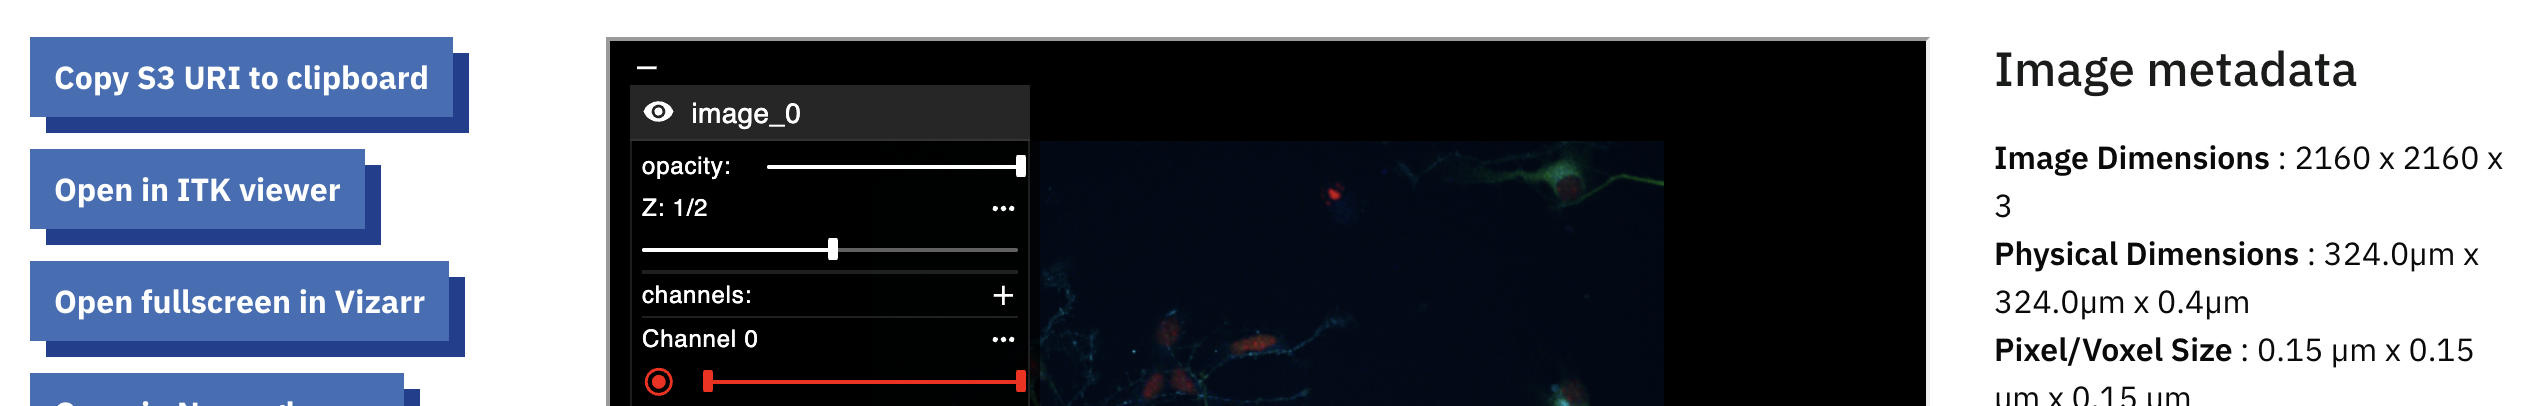


In [1]:
# for example we can use the following URL

url = "https://uk1s3.embassy.ebi.ac.uk/bia-integrator-data/EMPIAR-10819/IM1/IM1.zarr/0"

These are further examples you can try:

In [2]:
# url = "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0062A/6001240.zarr"
# url = "https://uk1s3.embassy.ebi.ac.uk/bia-integrator-data/EMPIAR-10310/IM1/IM1.zarr"
# url = "https://uk1s3.embassy.ebi.ac.uk/bia-integrator-data/EMPIAR-10819/IM1/IM1.zarr/0"
# url = "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/S-BIAD144/IM1.zarr/0"
# url = "https://uk1s3.embassy.ebi.ac.uk/bia-integrator-data/S-BIAD493/1f84458a-9965-41c3-9bfc-660f8f7ae984/1f84458a-9965-41c3-9bfc-660f8f7ae984.zarr/0"

## Use the `ngff_zarr` library to read the OME-Zarr file

In [3]:
import ngff_zarr as nz

multiscales = nz.from_ngff_zarr(url)

Let's print all the information the `multiscales` object contains.

In [4]:
import pprint
pprint.pprint(multiscales.__dict__)

{'chunks': None,
 'images': [NgffImage(data=dask.array<from-zarr, shape=(1, 1, 965, 7000, 5938), dtype=uint8, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>,
                      dims=['t', 'c', 'z', 'y', 'x'],
                      scale={'c': 1.0,
                             't': 1.0,
                             'x': 0.005,
                             'y': 0.005,
                             'z': 0.005},
                      translation={'c': 0.0,
                                   't': 0.0,
                                   'x': 0.0,
                                   'y': 0.0,
                                   'z': 0.0},
                      name='image',
                      axes_units={'c': None,
                                  't': None,
                                  'x': 'micrometer',
                                  'y': 'micrometer',
                                  'z': 'micrometer'},
                      computed_callbacks=[]),
            NgffI

## Use napari to visualize the data

We try out different ways to visualize the data in napari.

### First, show only the highest resolution level

Here we pass a dask array to napari. The data is loaded lazily and only when the data (or the chunk it's placed within) is required for visualization.

Currently, this only works for the "slice" view. The "volume" view is not compatible with lazy loading from dask arrays yet.

In [5]:
import napari

data = multiscales.images[0].data

viewer = napari.Viewer()
viewer.add_image(
    data,
)

<Image layer 'data' at 0x28c2eae90>

### Secondly, load all resolution levels as a multiscale pyramidal image into napari

As seen before, napari layers can be created not only from a single array, but from a list or arrays which represent the different resolution levels of a multiscale image. When loading a multiscale OME-Zarr image using `ngff_zarr`, the different resolution levels are available under `multscales.images[res_level].data`.

Do you see any performance differences between this and the previous approach?

In [6]:
viewer = napari.Viewer()
viewer.add_image(
    [level_image.data for level_image in multiscales.images],
)

<Image layer 'Image' at 0x2a8a59e10>

## Open in napari using the napari-ome-zarr plugin

Bypass the `ngff_zarr` library and use the `napari-ome-zarr` plugin to open the OME-Zarr file directly in napari.

This is convenient to quickly look at the data, however it doesn't directly give you access to the data within your Python code (although you could extract it from the napari layers).

In [7]:
viewer = napari.Viewer()
viewer.open(
    url,
    plugin="napari-ome-zarr"
)

[<Image layer 'Channel 0' at 0x29a0cc7d0>]